In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Loading the graph

In [3]:
def load_soln(path):
    # iterate each line as an edge
    parseNode = lambda x: tuple(sorted([int(y) for y in x.split(' ')]))
    graph = nx.read_edgelist(path, create_using=nx.DiGraph(), nodetype=parseNode, delimiter=' -> ')

    print(list(graph.edges())[:500])
    print(f"There are {len(graph.nodes())} nodes and {len(graph.edges())} edges")
    
    return graph

## Visualize the data
with a custom layout

In [8]:
def large_layout(graph):
    by_height = dict()
    
    for node in graph.nodes():
        height = -len(node)
        by_height[height] = by_height.get(height, []) + [node]
    
    layout = dict()
    
    for height in by_height:
        nodes = by_height[height]
        
        for i in range(len(nodes)):
            x = sum(nodes[i]) / len(nodes[i])
            layout[nodes[i]] = (x, height)
    
    return layout


def pretty_layout(graph):
    layout = nx.circular_layout(graph)
    layout = {node: (x, -len(node)) for node, (x, y) in layout.items()}
    return layout


def draw(graph):
    node_count = len(graph.nodes())
    sub = graph.subgraph(list(graph.nodes())[:node_count])

    # colored according out degree
    node_color = [sub.out_degree(node) for node in sub.nodes()]
    # edges colored according to source node
    edge_color = [sub.out_degree(edge[0]) for edge in sub.edges()]
    color_map = plt.get_cmap('cool')

    if node_count > 20:
        node_count = math.sqrt(node_count)
        nx.draw(sub, 
                large_layout(sub), 
                edge_cmap=color_map,
                edge_color=edge_color, 
                node_color=(0,0,0),
                edge_vmin=0,
                node_size=90/node_count,
                arrowsize=90/node_count,
                width=21/node_count)
    else:
        nx.draw(sub,
                large_layout(sub), 
                # nx.spring_layout(sub, k=0.5, iterations=20),
                cmap=color_map,
                edge_cmap=color_map,
                node_color=node_color,
                edge_color=edge_color,
                edge_vmin=0,
                with_labels=True,
                node_size=500,
                arrowsize=15,
                width=2,
                font_size=7)

    plt.show()

[((1, 2, 3, 5, 55, 144, 171, 212, 261, 378, 426, 529, 610, 638, 652, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 80, 144, 171, 212, 261, 293, 378, 426, 451, 477, 525, 529, 610, 638, 652, 662, 670, 674, 691, 717, 736)), ((1, 2, 3, 5, 55, 144, 171, 212, 261, 378, 426, 529, 610, 638, 652, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 18, 55, 75, 144, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736, 738)), ((1, 2, 3, 5, 55, 144, 171, 212, 261, 378, 426, 529, 610, 638, 652, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 65, 144, 153, 170, 171, 212, 231, 261, 293, 348, 378, 420, 426, 439, 448, 462, 484, 529, 535, 538, 558, 581, 610, 613, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736)), ((1, 2, 3, 5, 55, 144, 171, 212, 261, 378, 426, 529, 610, 638, 652, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 144, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638

/opt/homebrew/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


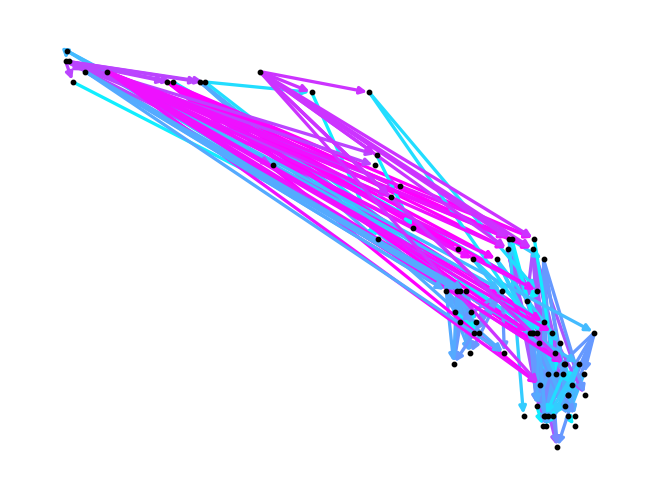

In [5]:
graph = load_soln("../../data/intersection/in_80.soln")
draw(graph)

[((2, 3, 5, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736), (2, 3, 5, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 717, 736)), ((2, 3, 5, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736), (2, 3, 5, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736)), ((2, 3, 5, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736), (1, 2, 3, 5, 144, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736)), ((2, 3, 5, 153, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 691, 736), (2, 3, 5, 55, 153, 171

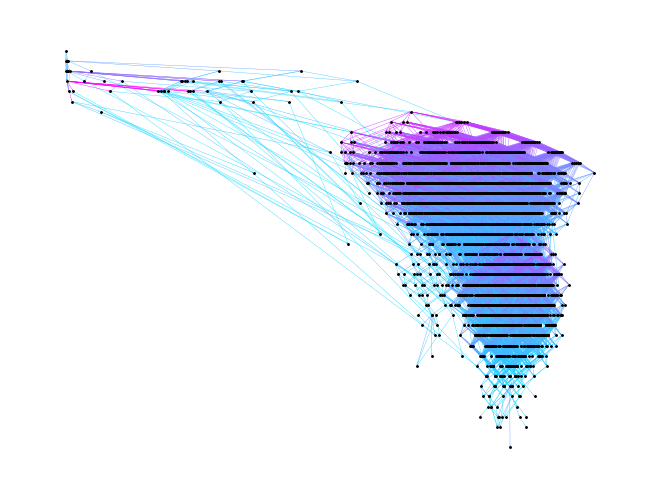

In [12]:
graph = load_soln("../../data/intersection/out_80.soln")
draw(graph)

[((1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)), ((1, 2, 4, 5, 6, 7, 8, 

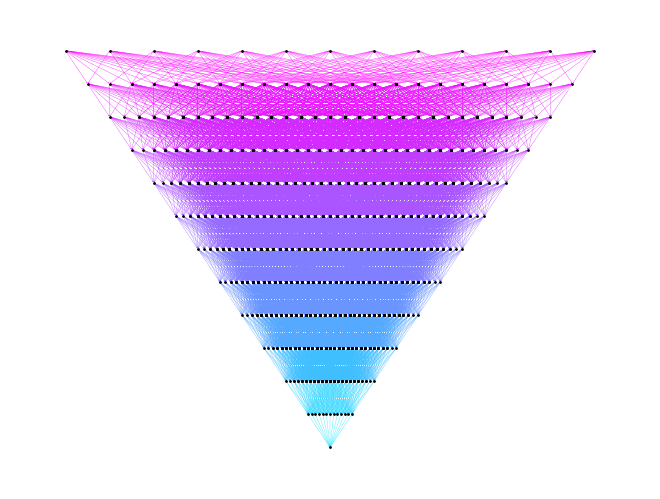

In [11]:
graph = load_soln("../../data/example/13-lattice.soln")
draw(graph)